<a href="https://colab.research.google.com/github/devocta/DCS_AI_STUDY/blob/MKJ/%EC%88%AB%EC%9E%90%EC%9D%B8%EC%8B%9D_AI_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install tensorflow
!pip install keras

import tensorflow as tf
import keras

In [ ]:
!pip install numpy
import numpy as np

In [ ]:
  from keras.datasets import mnist
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_images[0]

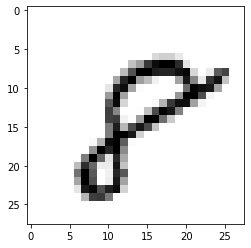

In [ ]:
digit = train_images[59999]
plt.imshow(digit, cmap = plt.cm.binary)

In [ ]:
origin_my_image = test_images[0]

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(layers.Dense(256, activation='relu', ))
model.add(layers.Dense(128, activation='relu', ))
model.add(layers.Dense(64, activation='relu', ))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer = 'rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [ ]:
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
test_labels = to_categorical(test_labels)

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2625 - accuracy: 0.9181
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0969 - accuracy: 0.9705
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0644 - accuracy: 0.9809
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0476 - accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.0379 - accuracy: 0.9881


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 82us/step


In [ ]:
test_acc

0.9753999710083008

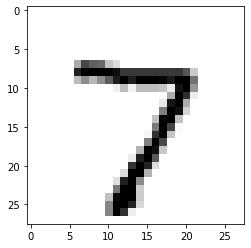

In [ ]:
myDigit = origin_my_image
plt.imshow(myDigit, cmap=plt.cm.binary)

In [ ]:
my_image = digit.reshape((1, 28*28))
output = model.predict(my_image)
print('result:', np.argmax(output))

result: 8


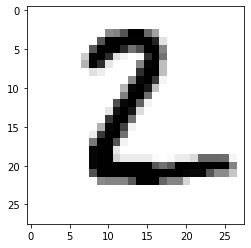

In [ ]:
(ti, tl), (testi, testl) = mnist.load_data()
plt.imshow(testi[1], cmap=plt.cm.binary)

In [ ]:
output = model.predict(testi[1].reshape((1,28*28)))
print('result:', np.argmax(output))

result: 2


In [ ]:
img = Image.open("4.jpg")
img = img.resize((28,28))
img_data = np.array(img)
img_data.shape

(28, 28, 3)

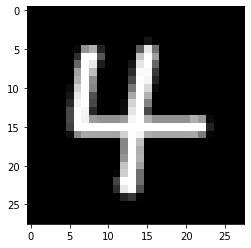

In [ ]:
plt.imshow(img_data)

In [ ]:
trans_img = img_data.transpose(2,0,1)
trans_img.shape

(3, 28, 28)

In [ ]:
np.savetxt("image.csv", trans_img[0], delimiter=',')

In [ ]:
trans_test_img = trans_img[0].reshape((1,28*28))
trans_test_img = trans_test_img.astype('float32')/255

In [ ]:
output = model.predict(trans_test_img)
print("result:", np.argmax(output))

result: 4


In [ ]:
output

array([[7.8638175e-07, 1.3790056e-07, 5.4594962e-05, 3.5909395e-09,
        9.9977201e-01, 5.3410758e-08, 1.6776049e-04, 2.8113006e-06,
        6.8205179e-07, 1.2642145e-06]], dtype=float32)